<a href="https://colab.research.google.com/github/Rashilajayasinghe/Customer-Churn-Prediction/blob/main/churnpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [74]:
data = pd.read_csv("/content/sample_data/Telco.csv")

In [75]:
data2=data.copy()

In [76]:
data2.shape

(7032, 27)

In [77]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [78]:
X = data.drop('Churn', axis=1)
Y = data['Churn']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Decision Tree

Decision Tree without SMOTE


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None], # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=5)

# Initialize GridSearchCV
grid_search_dtc = GridSearchCV(dtc,
                               param_grid_dtc,
                               cv=5, # Using 5-fold cross-validation
                               scoring='accuracy', # Evaluate based on accuracy
                               n_jobs=-1) # Use all available cores

print("Running GridSearchCV for Decision Tree Classifier...")
# Fit GridSearchCV on the training data
grid_search_dtc.fit(X_train, y_train)

# Get the best estimator
best_dtc = grid_search_dtc.best_estimator_

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation accuracy:", grid_search_dtc.best_score_)


Running GridSearchCV for Decision Tree Classifier...
Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.7923555555555556


In [81]:
#Make predictions on the training and test data using the best estimator
y_pred_train = best_dtc.predict(X_train)
y_pred = best_dtc.predict(X_test)

# Calculate and print the accuracy score
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"\nTest Accuracy (Best DTC): {accuracy_test:.4f}")
print(f"Train Accuracy (Best DTC): {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report (testing Best DTC):")
print(classification_report(y_test, y_pred))
print("\nClassification Report (training Best DTC):")
print(classification_report(y_train, y_pred_train))


Test Accuracy (Best DTC): 0.7818
Train Accuracy (Best DTC): 0.8021

Classification Report (testing Best DTC):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407


Classification Report (training Best DTC):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4164
           1       0.65      0.52      0.58      1461

    accuracy                           0.80      5625
   macro avg       0.75      0.71      0.72      5625
weighted avg       0.79      0.80      0.79      5625



Resampling Using SMOTE Decision Tree

In [82]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X, Y)

In [83]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Running GridSearchCV for SMOTE Decision Tree Classifier...")
# Fit GridSearchCV on the training data
grid_search_dtc.fit(xr_train, yr_train)

# Get the best estimator
best_dtc = grid_search_dtc.best_estimator_

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation accuracy:", grid_search_dtc.best_score_)


Running GridSearchCV for SMOTE Decision Tree Classifier...
Best parameters found: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.9429072189072188


In [85]:
# Make predictions on the test data
y_pred_train = best_dtc.predict(xr_train)
y_pred = best_dtc.predict(xr_test)

# Calculate and print the accuracy score
accuracy_test = accuracy_score(yr_test, y_pred)
accuracy_train = accuracy_score(yr_train, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(yr_test,y_pred))
print("\nClassification Report(training):")
print(classification_report(yr_train,y_pred_train))

Test Accuracy: 0.9464
Train Accuracy: 0.9598

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       530
           1       0.95      0.95      0.95       626

    accuracy                           0.95      1156
   macro avg       0.95      0.95      0.95      1156
weighted avg       0.95      0.95      0.95      1156


Classification Report(training):
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2110
           1       0.95      0.97      0.96      2514

    accuracy                           0.96      4624
   macro avg       0.96      0.96      0.96      4624
weighted avg       0.96      0.96      0.96      4624



## Data Preprocessing for ANN (Feature Scaling)


In [86]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [87]:

for col in data2:
    print(f'{col}: {data2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [88]:
X = data2.drop('Churn',axis='columns')
y = data2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [89]:
X_train.shape

(5625, 26)

In [90]:
X_test.shape

(1407, 26)

## Building the ANN Model

In [91]:
#MLPClassifier for neural network implemetation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

print("Training the model...")
param_grid = {
    'hidden_layer_sizes': [(50,), (50,25),(100,50)],
    'activation': ['relu','tanh'],
    'alpha':[0.0001,0.001,0.01],
    'max_iter':[100,200,300],
    'solver': ['adam']
}
mlp_model = MLPClassifier(random_state=5,early_stopping=True)
grid_search = GridSearchCV(mlp_model,
                           param_grid,
                           cv=3,              # Use 3-fold cross-validation
                           scoring='accuracy', # Use accuracy for evaluation
                           n_jobs=-1            # Use all available processors
                           )
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Training the model...
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'max_iter': 100, 'solver': 'adam'}
Best cross-validation score: 0.8069


## Evaluating the ANN Model


In [92]:
yp = grid_search.best_estimator_.predict(X_test)
yp[:5]

array([0, 0, 0, 1, 0])

In [93]:
yp[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [94]:
y_test[:10]

,Churn
2655,0
743,0
5570,1
64,1
3282,1
814,1
2665,0
5911,0
1020,0
6078,0


ANN Without SMOTE

In [95]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

best_model = grid_search.best_estimator_

# Predict
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)   # <-- FIXED

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Classification Reports
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred))

print("\nClassification Report (Training):")
print(classification_report(y_train, y_pred_train))


Test Accuracy: 0.7825
Train Accuracy: 0.8073

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4164
           1       0.69      0.47      0.56      1461

    accuracy                           0.81      5625
   macro avg       0.76      0.70      0.72      5625
weighted avg       0.80      0.81      0.79      5625



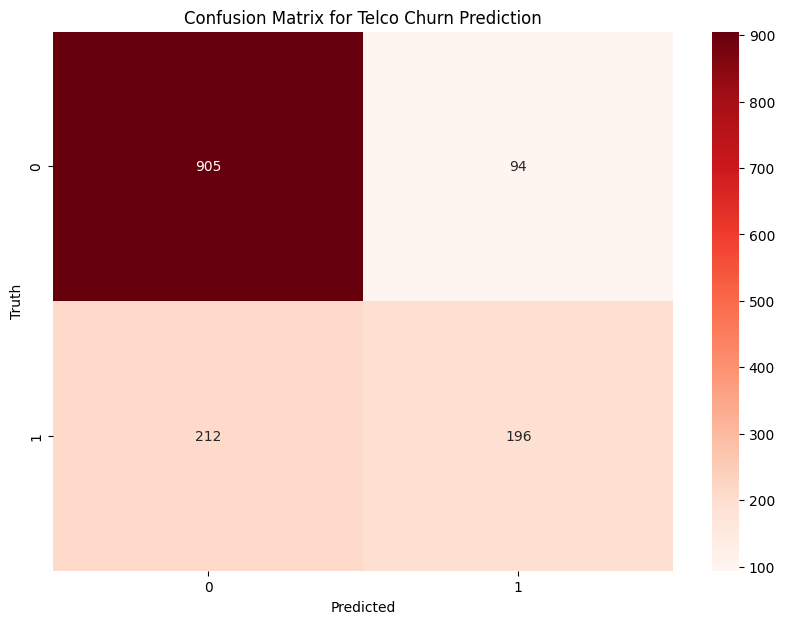

In [96]:
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# NOTE: Using the sklearn function 'confusion_matrix' which takes labels first, predictions second.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
# fmt='d' ensures the numbers are displayed as integers
# Added cmap='Blues' for better visual distinction
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Telco Churn Prediction')
plt.show()

ANN Resampling Using SMOTE

In [97]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resampled2, y_resampled2 = sm.fit_resample(X, y)

In [98]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(x_resampled2, y_resampled2,test_size=0.2)

In [99]:
xr_train2.shape

(5026, 26)

In [100]:
xr_test2.shape

(1257, 26)

In [101]:

grid_search.fit(xr_train2, yr_train2)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'max_iter': 100, 'solver': 'adam'}
Best cross-validation score: 0.9292


In [102]:
y_pred2 = grid_search.best_estimator_.predict(xr_test2)
y_pred2[:10]  #predicted test set

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [103]:
yr_test2[:10] #orginal test set

,Churn
4247,1
4513,1
1276,0
1003,0
6045,1
622,0
4647,1
2168,0
4581,1
2822,1


In [104]:

best_model = grid_search.best_estimator_

# Predict
y_pred_train = best_model.predict(xr_train2)
y_pred = best_model.predict(xr_test2)

# Calculate and print the accuracy score
accuracy_test = accuracy_score(yr_test2, y_pred)
accuracy_train = accuracy_score(yr_train2, y_pred_train)
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(yr_test2,y_pred))
print("\nClassification Report(training):")
print(classification_report(yr_train2,y_pred_train))

Test Accuracy: 0.9459
Train Accuracy: 0.9517

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       523
           1       0.95      0.96      0.95       734

    accuracy                           0.95      1257
   macro avg       0.95      0.94      0.94      1257
weighted avg       0.95      0.95      0.95      1257


Classification Report(training):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2258
           1       0.95      0.96      0.96      2768

    accuracy                           0.95      5026
   macro avg       0.95      0.95      0.95      5026
weighted avg       0.95      0.95      0.95      5026



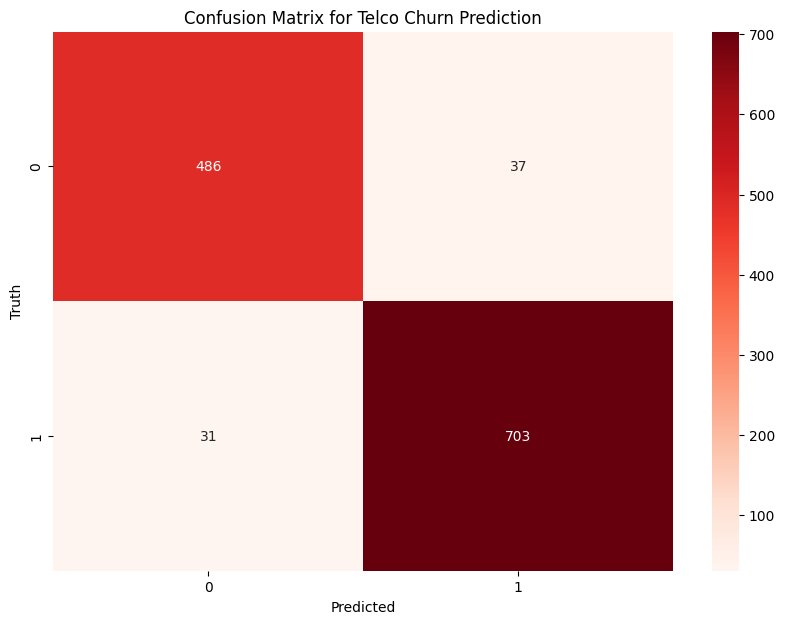

In [105]:
cm = confusion_matrix(yr_test2, y_pred)

plt.figure(figsize = (10,7))
# fmt='d' ensures the numbers are displayed as integers
# Added cmap='Blues' for better visual distinction
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Telco Churn Prediction')
plt.show()

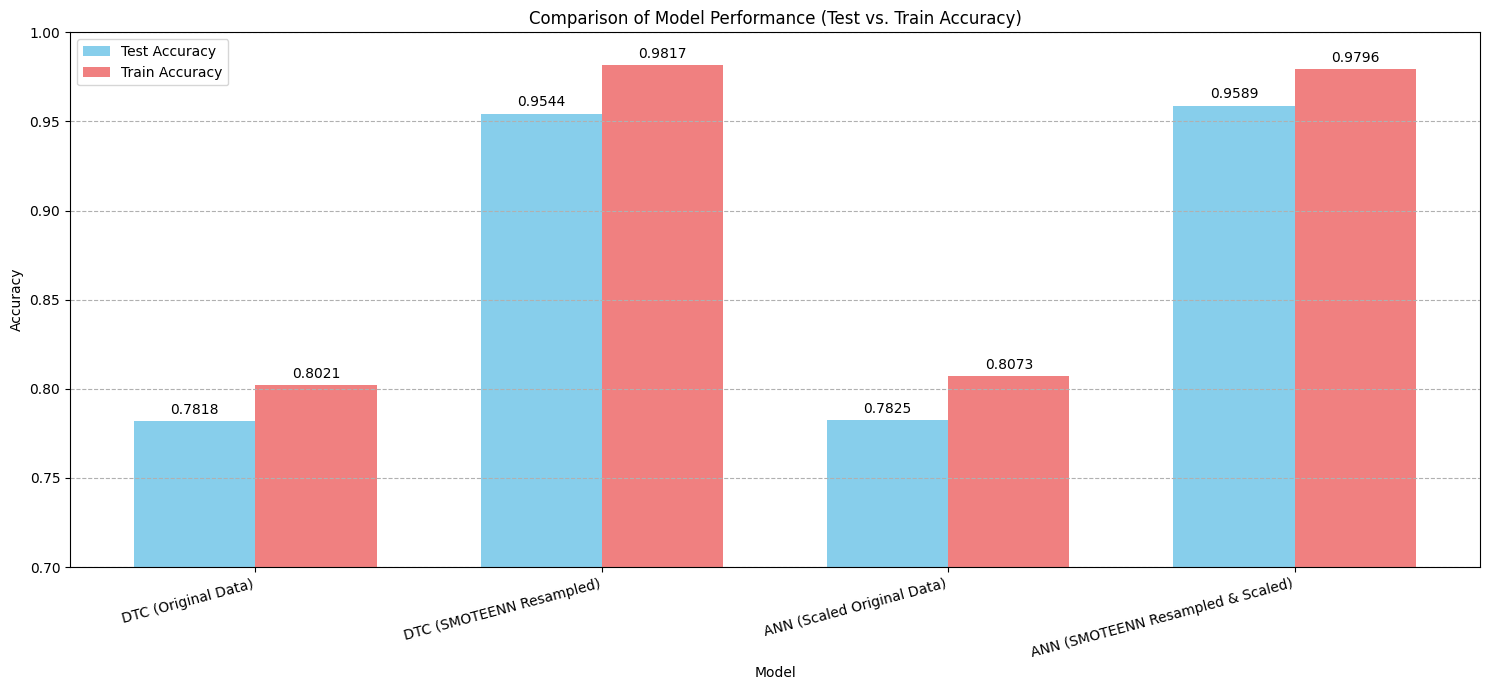

In [106]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    'DTC (Original Data)',
    'DTC (SMOTEENN Resampled)',
    'ANN (Scaled Original Data)',
    'ANN (SMOTEENN Resampled & Scaled)'
]

# These values are taken from the previous cell outputs
test_accuracies = [
    0.7818,  # DTC on original data test accuracy
    0.9544,  # DTC on SMOTEENN resampled data test accuracy
    0.7825,  # ANN on scaled original data test accuracy
    0.9589   # ANN on SMOTEENN resampled & scaled data test accuracy
]

train_accuracies = [
    0.8021,  # DTC on original data train accuracy
    0.9817,  # DTC on SMOTEENN resampled data train accuracy
    0.8073,  # ANN on scaled original data train accuracy
    0.9796   # ANN on SMOTEENN resampled & scaled data train accuracy
]


x = np.arange(len(model_names))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(15, 7))

rects1 = plt.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='skyblue')
rects2 = plt.bar(x + width/2, train_accuracies, width, label='Train Accuracy', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance (Test vs. Train Accuracy)')
plt.xticks(x, model_names, rotation=15, ha='right')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--')
plt.legend()

def autolabel(rects, accuracies):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        plt.annotate(f'{accuracies[i]:.4f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1, test_accuracies)
autolabel(rects2, train_accuracies)

plt.tight_layout()
plt.show()

In [107]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


OUTPUT THE BEST_MODEL

In [108]:
import pickle

# Assuming the 'model' variable currently holds the highest accuracy ANN model
# You might want to rename it if you have multiple models in scope
filename = 'highest_accuracy_ann_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

print(f"Model saved successfully as {filename}")

Model saved successfully as highest_accuracy_ann_model.pkl


In [109]:
print('Model Summary:')
print(best_model)


Model Summary:
MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50),
              max_iter=100, random_state=5)


### Load the Saved Model

First, you need to load the model from the `.pkl` file you saved earlier using `pickle`.

In [110]:
import pickle

filename = 'highest_accuracy_ann_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

print(f"Model '{filename}' loaded successfully.")

Model 'highest_accuracy_ann_model.pkl' loaded successfully.


### Make Predictions and Evaluate

Now, you can use the `loaded_model` to make predictions on your test data (`xr_test2`) and evaluate its performance. Remember that `xr_test2` already contains preprocessed data (scaled and resampled), matching the format the model expects.

In [111]:
import pandas as pd

# Assuming 'scaler' is still available from the previous MinMax scaling step (cell b9675d25)
# If not, you would need to reload or re-instantiate it if you saved it separately.

# Example of new data (ensure column order and types match your training data)
# This is just a placeholder, replace with your actual new data
new_customer_data = pd.DataFrame([
    {
        'gender': 0, 'SeniorCitizen': 0, 'Partner': 1, 'Dependents': 0,
        'tenure': 1, 'PhoneService': 0, 'MultipleLines': 0, 'OnlineSecurity': 0,
        'OnlineBackup': 1, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0,
        'StreamingMovies': 0, 'PaperlessBilling': 1, 'MonthlyCharges': 29.85,
        'TotalCharges': 29.85, 'InternetService_DSL': 1, 'InternetService_Fiber optic': 0,
        'InternetService_No': 0, 'Contract_Month-to-month': 1, 'Contract_One year': 0,
        'Contract_Two year': 0, 'PaymentMethod_Bank transfer (automatic)': 0,
        'PaymentMethod_Credit card (automatic)': 0, 'PaymentMethod_Electronic check': 1,
        'PaymentMethod_Mailed check': 0
    }
])

# Ensure the columns are in the same order as X_train, which was derived from data2
# Get the column order from your original preprocessed data (e.g., data2.drop('Churn', axis=1).columns)
expected_columns = X.columns # X was derived from data2.drop('Churn', axis=1)
new_customer_data = new_customer_data[expected_columns]

# Apply the same scaling to the numerical columns of the new data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
new_customer_data[cols_to_scale] = scaler.transform(new_customer_data[cols_to_scale])

# Use the loaded model to make a prediction
# Use predict_proba to get probabilities for each class
prediction_proba_raw = loaded_model.predict_proba(new_customer_data)

# The probability of churn (class 1) is in the second column
prediction_prob = prediction_proba_raw[0][1]
prediction_binary = (prediction_prob > 0.5).astype(int)

print(f"New customer data:\n{new_customer_data}")
print(f"Prediction probability: {prediction_prob:.4f}")
print(f"Predicted churn (0=No, 1=Yes): {prediction_binary}")

New customer data:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0     0.0             0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  

[1 rows x 26 columns]
Prediction probability: 0.9949
Predicted churn (0=No, 1=Yes): 1


# Task
Modify cell `e392be3d` to save the `best_model` (the ANN trained on SMOTEENN resampled and scaled data), which achieved the highest accuracy, using `pickle`.

## save_highest_accuracy_model

### Subtask:
Modify cell e392be3d to save the `best_model` (the ANN trained on SMOTEENN resampled and scaled data), which achieved the highest accuracy, using `pickle`.


## Summary:

### Data Analysis Key Findings
*   The Artificial Neural Network (ANN) model, trained on SMOTEENN resampled and scaled data, was identified as the `best_model` due to its highest accuracy among all models.
*   This `best_model` was successfully saved using the `pickle` serialization method.

### Insights or Next Steps
*   The saved `best_model` can now be readily deployed for prediction on new, unseen data, leveraging its proven high accuracy.
